In [ ]:
"""
This file, reads the raw data and normalizes and compresses it removing excess data, thus simplifies the data 
while no critical information is lost for the purpose of predicting the load for auto-scaling purposes

The output is three moving average (MA) datasets of minimum, average, and maximum MV data.
Outputs can be seen throughout the notebook.
"""

In [61]:
from pandas import read_csv
import pandas as pd
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


In [11]:
series = read_csv('data.csv', header=0, usecols=['VM_load'])

In [13]:
series = series["VM_load"]

In [45]:
X = series.values
window = 500 
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
higher_bound = list()
lower_bound = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    #window_list = [history[i] for i in range(max(0, int(length-window / 2)),min(length, int(length + window/2)))]
    window_list = history[max(0, int(length - window / 2)):min(length, int(length + window/2))]
    yhat = mean(window_list)
    obs = test[t]
    higher_bound.append(max(window_list))
    lower_bound.append(min(window_list))
    predictions.append(yhat)
    history.append(obs)
    if t % 1000 == 1:
        print("%.3f" % (t / len(test) * 100.0))
        print(t, 'of', len(test))
        #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


0.000
1 of 2073100
0.048
1001 of 2073100
0.097
2001 of 2073100
0.145
3001 of 2073100
0.193
4001 of 2073100
0.241
5001 of 2073100
0.289
6001 of 2073100
0.338
7001 of 2073100
0.386
8001 of 2073100
0.434
9001 of 2073100
0.482
10001 of 2073100
0.531
11001 of 2073100
0.579
12001 of 2073100
0.627
13001 of 2073100
0.675
14001 of 2073100
0.724
15001 of 2073100
0.772
16001 of 2073100
0.820
17001 of 2073100
0.868
18001 of 2073100
0.917
19001 of 2073100
0.965
20001 of 2073100
1.013
21001 of 2073100
1.061
22001 of 2073100
1.109
23001 of 2073100
1.158
24001 of 2073100
1.206
25001 of 2073100
1.254
26001 of 2073100
1.302
27001 of 2073100
1.351
28001 of 2073100
1.399
29001 of 2073100
1.447
30001 of 2073100
1.495
31001 of 2073100
1.544
32001 of 2073100
1.592
33001 of 2073100
1.640
34001 of 2073100
1.688
35001 of 2073100
1.737
36001 of 2073100
1.785
37001 of 2073100
1.833
38001 of 2073100
1.881
39001 of 2073100
1.930
40001 of 2073100
1.978
41001 of 2073100
2.026
42001 of 2073100
2.074
43001 of 2073100
2

16.545
343001 of 2073100
16.594
344001 of 2073100
16.642
345001 of 2073100
16.690
346001 of 2073100
16.738
347001 of 2073100
16.787
348001 of 2073100
16.835
349001 of 2073100
16.883
350001 of 2073100
16.931
351001 of 2073100
16.979
352001 of 2073100
17.028
353001 of 2073100
17.076
354001 of 2073100
17.124
355001 of 2073100
17.172
356001 of 2073100
17.221
357001 of 2073100
17.269
358001 of 2073100
17.317
359001 of 2073100
17.365
360001 of 2073100
17.414
361001 of 2073100
17.462
362001 of 2073100
17.510
363001 of 2073100
17.558
364001 of 2073100
17.607
365001 of 2073100
17.655
366001 of 2073100
17.703
367001 of 2073100
17.751
368001 of 2073100
17.799
369001 of 2073100
17.848
370001 of 2073100
17.896
371001 of 2073100
17.944
372001 of 2073100
17.992
373001 of 2073100
18.041
374001 of 2073100
18.089
375001 of 2073100
18.137
376001 of 2073100
18.185
377001 of 2073100
18.234
378001 of 2073100
18.282
379001 of 2073100
18.330
380001 of 2073100
18.378
381001 of 2073100
18.427
382001 of 2073100


32.512
674001 of 2073100
32.560
675001 of 2073100
32.608
676001 of 2073100
32.656
677001 of 2073100
32.705
678001 of 2073100
32.753
679001 of 2073100
32.801
680001 of 2073100
32.849
681001 of 2073100
32.898
682001 of 2073100
32.946
683001 of 2073100
32.994
684001 of 2073100
33.042
685001 of 2073100
33.091
686001 of 2073100
33.139
687001 of 2073100
33.187
688001 of 2073100
33.235
689001 of 2073100
33.284
690001 of 2073100
33.332
691001 of 2073100
33.380
692001 of 2073100
33.428
693001 of 2073100
33.476
694001 of 2073100
33.525
695001 of 2073100
33.573
696001 of 2073100
33.621
697001 of 2073100
33.669
698001 of 2073100
33.718
699001 of 2073100
33.766
700001 of 2073100
33.814
701001 of 2073100
33.862
702001 of 2073100
33.911
703001 of 2073100
33.959
704001 of 2073100
34.007
705001 of 2073100
34.055
706001 of 2073100
34.104
707001 of 2073100
34.152
708001 of 2073100
34.200
709001 of 2073100
34.248
710001 of 2073100
34.297
711001 of 2073100
34.345
712001 of 2073100
34.393
713001 of 2073100


48.382
1003001 of 2073100
48.430
1004001 of 2073100
48.478
1005001 of 2073100
48.526
1006001 of 2073100
48.575
1007001 of 2073100
48.623
1008001 of 2073100
48.671
1009001 of 2073100
48.719
1010001 of 2073100
48.768
1011001 of 2073100
48.816
1012001 of 2073100
48.864
1013001 of 2073100
48.912
1014001 of 2073100
48.961
1015001 of 2073100
49.009
1016001 of 2073100
49.057
1017001 of 2073100
49.105
1018001 of 2073100
49.153
1019001 of 2073100
49.202
1020001 of 2073100
49.250
1021001 of 2073100
49.298
1022001 of 2073100
49.346
1023001 of 2073100
49.395
1024001 of 2073100
49.443
1025001 of 2073100
49.491
1026001 of 2073100
49.539
1027001 of 2073100
49.588
1028001 of 2073100
49.636
1029001 of 2073100
49.684
1030001 of 2073100
49.732
1031001 of 2073100
49.781
1032001 of 2073100
49.829
1033001 of 2073100
49.877
1034001 of 2073100
49.925
1035001 of 2073100
49.974
1036001 of 2073100
50.022
1037001 of 2073100
50.070
1038001 of 2073100
50.118
1039001 of 2073100
50.166
1040001 of 2073100
50.215
10410

63.818
1323001 of 2073100
63.866
1324001 of 2073100
63.914
1325001 of 2073100
63.962
1326001 of 2073100
64.010
1327001 of 2073100
64.059
1328001 of 2073100
64.107
1329001 of 2073100
64.155
1330001 of 2073100
64.203
1331001 of 2073100
64.252
1332001 of 2073100
64.300
1333001 of 2073100
64.348
1334001 of 2073100
64.396
1335001 of 2073100
64.445
1336001 of 2073100
64.493
1337001 of 2073100
64.541
1338001 of 2073100
64.589
1339001 of 2073100
64.638
1340001 of 2073100
64.686
1341001 of 2073100
64.734
1342001 of 2073100
64.782
1343001 of 2073100
64.830
1344001 of 2073100
64.879
1345001 of 2073100
64.927
1346001 of 2073100
64.975
1347001 of 2073100
65.023
1348001 of 2073100
65.072
1349001 of 2073100
65.120
1350001 of 2073100
65.168
1351001 of 2073100
65.216
1352001 of 2073100
65.265
1353001 of 2073100
65.313
1354001 of 2073100
65.361
1355001 of 2073100
65.409
1356001 of 2073100
65.458
1357001 of 2073100
65.506
1358001 of 2073100
65.554
1359001 of 2073100
65.602
1360001 of 2073100
65.651
13610

79.205
1642001 of 2073100
79.253
1643001 of 2073100
79.302
1644001 of 2073100
79.350
1645001 of 2073100
79.398
1646001 of 2073100
79.446
1647001 of 2073100
79.495
1648001 of 2073100
79.543
1649001 of 2073100
79.591
1650001 of 2073100
79.639
1651001 of 2073100
79.687
1652001 of 2073100
79.736
1653001 of 2073100
79.784
1654001 of 2073100
79.832
1655001 of 2073100
79.880
1656001 of 2073100
79.929
1657001 of 2073100
79.977
1658001 of 2073100
80.025
1659001 of 2073100
80.073
1660001 of 2073100
80.122
1661001 of 2073100
80.170
1662001 of 2073100
80.218
1663001 of 2073100
80.266
1664001 of 2073100
80.315
1665001 of 2073100
80.363
1666001 of 2073100
80.411
1667001 of 2073100
80.459
1668001 of 2073100
80.508
1669001 of 2073100
80.556
1670001 of 2073100
80.604
1671001 of 2073100
80.652
1672001 of 2073100
80.700
1673001 of 2073100
80.749
1674001 of 2073100
80.797
1675001 of 2073100
80.845
1676001 of 2073100
80.893
1677001 of 2073100
80.942
1678001 of 2073100
80.990
1679001 of 2073100
81.038
16800

94.496
1959001 of 2073100
94.544
1960001 of 2073100
94.593
1961001 of 2073100
94.641
1962001 of 2073100
94.689
1963001 of 2073100
94.737
1964001 of 2073100
94.786
1965001 of 2073100
94.834
1966001 of 2073100
94.882
1967001 of 2073100
94.930
1968001 of 2073100
94.979
1969001 of 2073100
95.027
1970001 of 2073100
95.075
1971001 of 2073100
95.123
1972001 of 2073100
95.172
1973001 of 2073100
95.220
1974001 of 2073100
95.268
1975001 of 2073100
95.316
1976001 of 2073100
95.364
1977001 of 2073100
95.413
1978001 of 2073100
95.461
1979001 of 2073100
95.509
1980001 of 2073100
95.557
1981001 of 2073100
95.606
1982001 of 2073100
95.654
1983001 of 2073100
95.702
1984001 of 2073100
95.750
1985001 of 2073100
95.799
1986001 of 2073100
95.847
1987001 of 2073100
95.895
1988001 of 2073100
95.943
1989001 of 2073100
95.992
1990001 of 2073100
96.040
1991001 of 2073100
96.088
1992001 of 2073100
96.136
1993001 of 2073100
96.185
1994001 of 2073100
96.233
1995001 of 2073100
96.281
1996001 of 2073100
96.329
19970

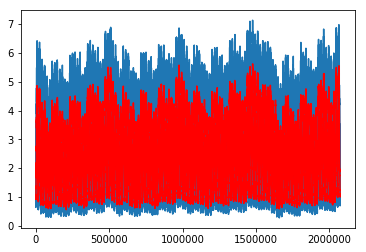

In [41]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot


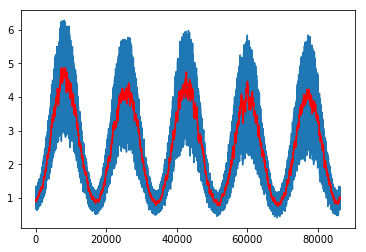

In [36]:
# plot 5 days
pyplot.plot(test[int(10 * 24 * 3600):int(11 * 24 * 3600) ])
pyplot.plot(predictions[int(10 * 24 * 3600):int(11 * 24 * 3600)], color='red')
pyplot.show()

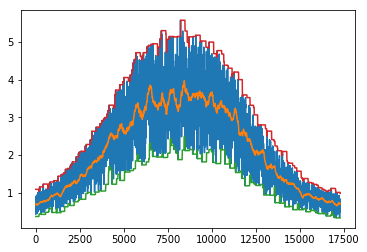

In [47]:
#plot one day
pyplot.plot(test[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5) ])
pyplot.plot(predictions[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5)])
pyplot.plot(lower_bound[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5)] )
pyplot.plot(higher_bound[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5)] )

pyplot.show()

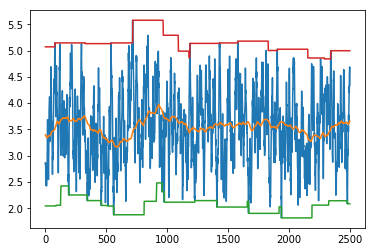

In [48]:
pyplot.plot(test[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000) ])
pyplot.plot(predictions[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000)])
pyplot.plot(lower_bound[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000)])
pyplot.plot(higher_bound[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000)])
pyplot.show()

In [53]:
X1 = lower_bound
X2 = higher_bound
window = 1000 
history1 = [X1[i] for i in range(window)]
history2 = [X2[i] for i in range(window)]
test1 = [X1[i] for i in range(window, len(X1))]
test2 = [X2[i] for i in range(window, len(X2))]
predictions1 = list()
predictions2 = list()
# walk forward over time steps in test
for t in range(len(test1)):
    length = len(history1)
    #window_list = [history[i] for i in range(max(0, int(length-window / 2)),min(length, int(length + window/2)))]
    window_list1 = history1[max(0, int(length - window / 2)):min(length, int(length + window/2))]
    window_list2 = history2[max(0, int(length - window / 2)):min(length, int(length + window/2))]
    yhat1 = mean(window_list1)
    yhat2 = mean(window_list2)
    obs1 = test1[t]
    obs2 = test2[t]
    predictions1.append(yhat1)
    predictions2.append(yhat2)
    history1.append(obs1)
    history2.append(obs2)
    if t % 10000 == 1:
        print("%.3f" % (t / len(test) * 100.0))
        print(t, 'of', len(test))
        #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

0.000
1 of 2073100
0.482
10001 of 2073100
0.965
20001 of 2073100
1.447
30001 of 2073100
1.930
40001 of 2073100
2.412
50001 of 2073100
2.894
60001 of 2073100
3.377
70001 of 2073100
3.859
80001 of 2073100
4.341
90001 of 2073100
4.824
100001 of 2073100
5.306
110001 of 2073100
5.788
120001 of 2073100
6.271
130001 of 2073100
6.753
140001 of 2073100
7.236
150001 of 2073100
7.718
160001 of 2073100
8.200
170001 of 2073100
8.683
180001 of 2073100
9.165
190001 of 2073100
9.647
200001 of 2073100
10.130
210001 of 2073100
10.612
220001 of 2073100
11.095
230001 of 2073100
11.577
240001 of 2073100
12.059
250001 of 2073100
12.542
260001 of 2073100
13.024
270001 of 2073100
13.506
280001 of 2073100
13.989
290001 of 2073100
14.471
300001 of 2073100
14.953
310001 of 2073100
15.436
320001 of 2073100
15.918
330001 of 2073100
16.401
340001 of 2073100
16.883
350001 of 2073100
17.365
360001 of 2073100
17.848
370001 of 2073100
18.330
380001 of 2073100
18.812
390001 of 2073100
19.295
400001 of 2073100
19.777
410

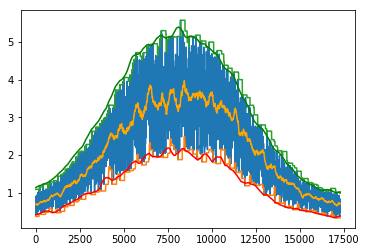

In [60]:
#plot one day
pyplot.plot(test[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5) ])
pyplot.plot(lower_bound[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5) ])
pyplot.plot(higher_bound[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5) ])
pyplot.plot(predictions[int(10 * 24 * 3600 / 5):int(11 * 24 * 3600 / 5)], color='orange')
pyplot.plot(predictions1[int(10 * 24 * 3600 / 5 - 500):int(11 * 24 * 3600 / 5 - 500)],color='red' )
pyplot.plot(predictions2[int(10 * 24 * 3600 / 5 - 500):int(11 * 24 * 3600 / 5 - 500)], color='green' )

pyplot.show()

In [65]:
print(len(predictions[:-1000]), len(predictions1), len(predictions2))
df = pd.DataFrame()
df['moving_average'] = predictions[:-1000]
df['lower_bound'] = predictions1
df['higher_bound'] = predictions2

2072100 2072100 2072100


In [66]:
df.to_csv('MV.csv')

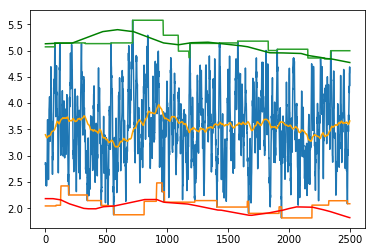

In [68]:
#plot one day
pyplot.plot(test[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000) ])
pyplot.plot(lower_bound[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000) ])
pyplot.plot(higher_bound[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000) ])
pyplot.plot(predictions[int(10 * 24 * 3600 / 5 + 7500):int(10 * 24 * 3600 / 5 + 10000)], color='orange')
pyplot.plot(predictions1[int(10 * 24 * 3600 / 5 - 500 + 7500):int(10 * 24 * 3600 / 5 - 500 + 10000)],color='red' )
pyplot.plot(predictions2[int(10 * 24 * 3600 / 5 - 500 + 7500):int(10 * 24 * 3600 / 5 - 500 + 10000)], color='green' )

pyplot.show()